<a href="https://colab.research.google.com/github/namrathakilari/My_Journey_of_AIML/blob/main/Phase1_Basics/text_to_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Converting text to features:***

unigram-single word
bigram- 2 words
used in bag-of-words

In [ ]:
import pandas as pd
import numpy as np

# Example: Text data → Features
texts = ["I love this!", "Terrible product", "Amazing quality"]

# Feature extraction (simple bag-of-words approach)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(texts)

print("Text features as array:")
print(text_features.toarray())
print("\nFeature names (vocabulary):")
print(vectorizer.get_feature_names_out())

# Convert to CSV-like format (DataFrame)
df = pd.DataFrame(text_features.toarray(),
                  columns=vectorizer.get_feature_names_out())
print("\nAs DataFrame (CSV-like structure):")
print(df)

Text features as array:
[[0 1 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 0]]

Feature names (vocabulary):
['amazing' 'love' 'product' 'quality' 'terrible' 'this']

As DataFrame (CSV-like structure):
   amazing  love  product  quality  terrible  this
0        0     1        0        0         0     1
1        0     0        1        0         1     0
2        1     0        0        1         0     0


Conversion of dataset to csv

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create DataFrame (like a CSV)
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

print("Iris dataset in CSV-like format:")
print(df_iris.head())

# Save as actual CSV
df_iris.to_csv('iris_dataset.csv', index=False)
print("\n✓ Saved as iris_dataset.csv")

Iris dataset in CSV-like format:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

✓ Saved as iris_dataset.csv


In [ ]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=b5f87c34562d90df61d26a6795d151507f52b5fb03326e01dfa5a0dac2a876bf
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


Count number of words in 4 docs- 2 french,2 english
each of both about giraffe and elephant

In [ ]:
import wikipedia

# Fix for Wikipedia PageError
topic1 = 'Giraffe'
topic2 = 'Elephant'

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content with error handling"""
    wikipedia.set_lang(lang)
    try:
        # Disable auto-suggest to prevent title mismatches
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        # If multiple pages exist, use the first option
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        # If page not found, try with auto-suggest enabled
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Fetch content
eng1 = get_wikipedia_content(topic1, 'en')
eng2 = get_wikipedia_content(topic2, 'en')
fr1 = get_wikipedia_content(topic1, 'fr')
fr2 = get_wikipedia_content(topic2, 'fr')

print("✓ Successfully fetched all Wikipedia pages")
print(f"English {topic1} length: {len(eng1)} characters")
print(f"English {topic2} length: {len(eng2)} characters")
print(f"French {topic1} length: {len(fr1)} characters")
print(f"French {topic2} length: {len(fr2)} characters")

/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Disambiguation for 'Elephant': using 'éléphant'
✓ Successfully fetched all Wikipedia pages
English Giraffe length: 40373 characters
English Elephant length: 56129 characters
French Giraffe length: 28657 characters
French Elephant length: 40538 characters


now, we clean the 4 docs

In [ ]:

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

now we create functions to form a histogram for frequency of each letter in these 4 docs

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

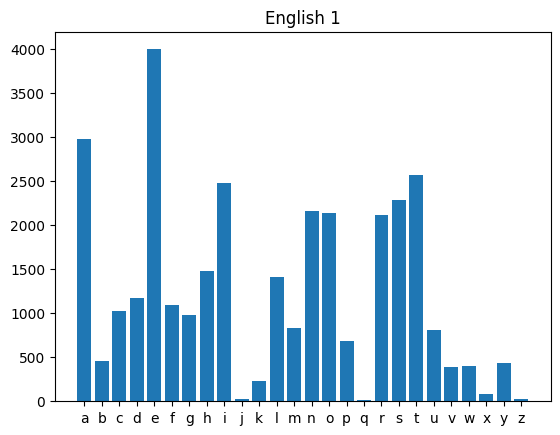

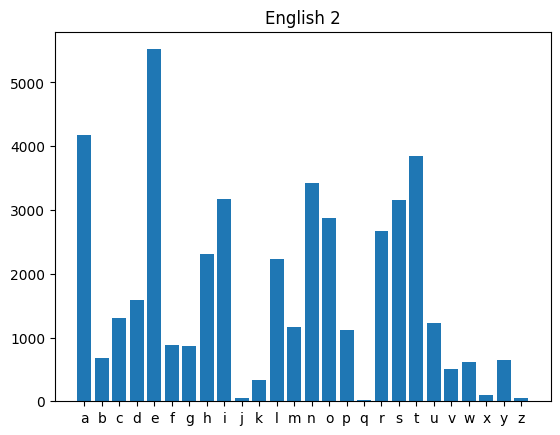

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

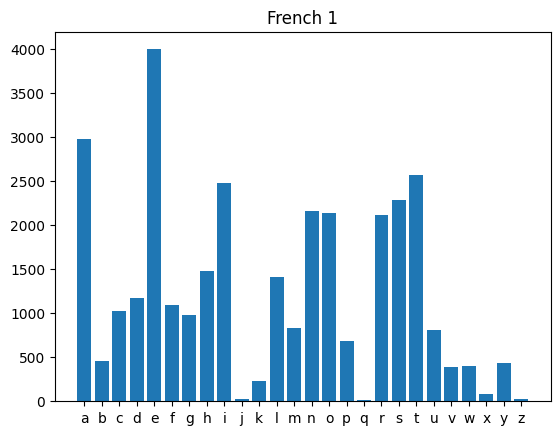

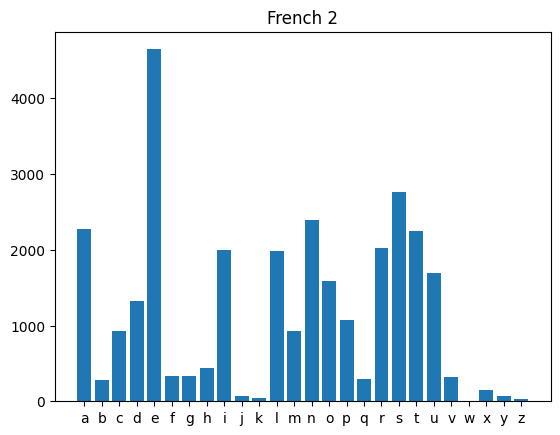

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

lets take a look at bigrams now since they look almost the same

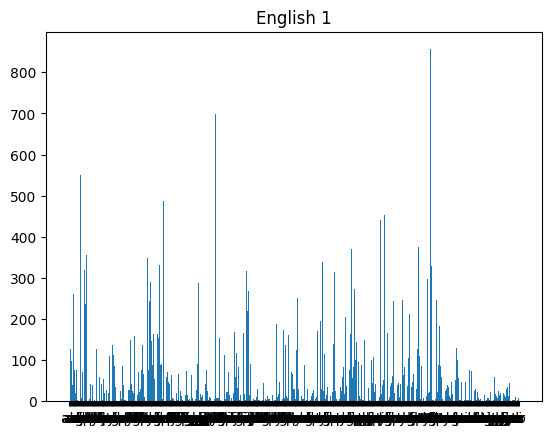

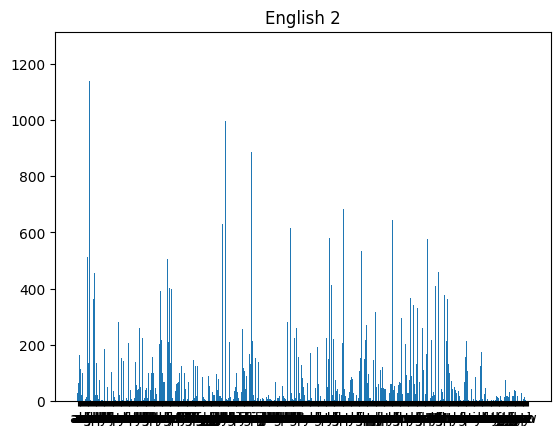

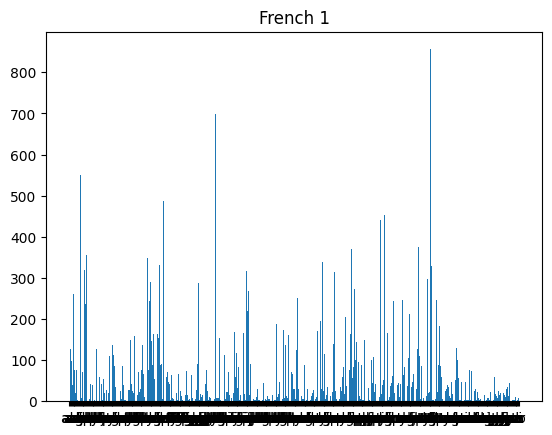

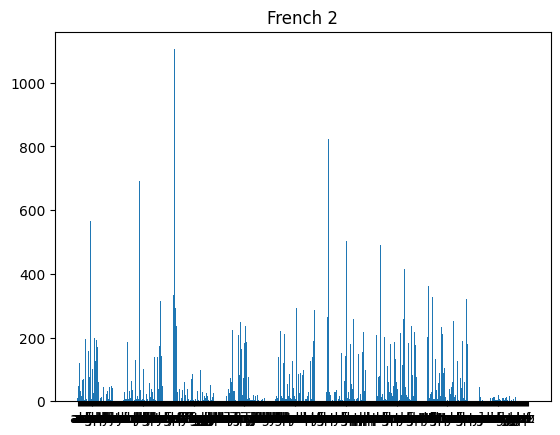

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Considering that they look almost the same, its not a good
so lets look at bihistograms

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

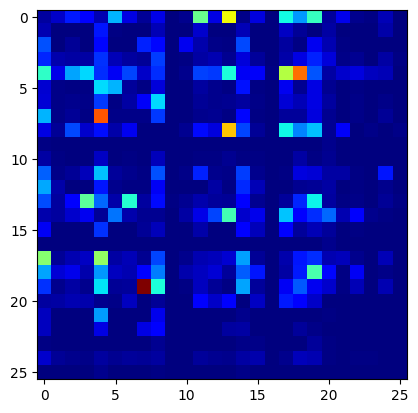

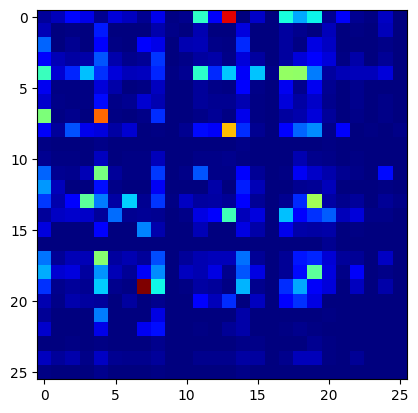

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

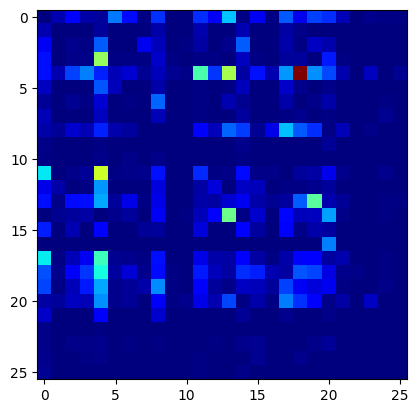

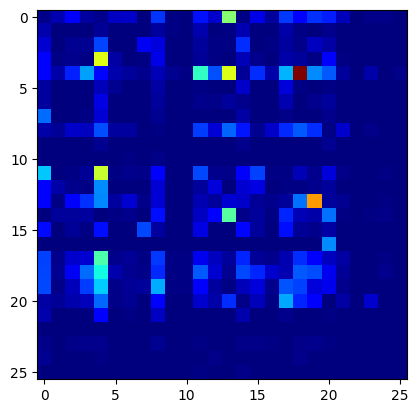

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Now lets look at 10 ngrams for better understand

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 699.0
('e', 's') : 677.0
('i', 'n') : 601.0
('a', 'n') : 550.0
('e', 'r') : 486.0
('r', 'e') : 452.0
('r', 'a') : 440.0
('a', 'l') : 408.0
('n', 'd') : 397.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1139.0
('h', 'e') : 997.0
('i', 'n') : 885.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 656.0
('r', 'e') : 644.0
('h', 'a') : 629.0
('l', 'e') : 616.0

French 1:
('e', 's') : 788.0
('l', 'e') : 473.0
('e', 'n') : 435.0
('d', 'e') : 420.0
('o', 'n') : 379.0
('n', 't') : 362.0
('e', 'l') : 345.0
('r', 'e') : 335.0
('s', 'e') : 296.0
('r', 'a') : 282.0

French 2:
('e', 's') : 1105.0
('n', 't') : 823.0
('d', 'e') : 690.0
('e', 'n') : 686.0
('l', 'e') : 652.0
('a', 'n') : 566.0
('o', 'n') : 504.0
('r', 'e') : 492.0
('e', 'l') : 456.0
('s', 'e') : 414.0


We can notice that there isn't any difference between the topics but there is a noticeable difference between languages

**LET'S NOW TAKE A DIFFERENT EXAMPLE FOR FINDING FEATURES OF TEXT**

In [ ]:
import wikipedia
topic1="Benign cancer"
topic2="Malignant cancer"

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content with error handling"""
    wikipedia.set_lang(lang)
    try:
        # Disable auto-suggest to prevent title mismatches
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        # If multiple pages exist, use the first option
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        # If page not found, try with auto-suggest enabled
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Fetch content
es1 = get_wikipedia_content(topic1, 'es')
es2 = get_wikipedia_content(topic2, 'es')
zh1 = get_wikipedia_content(topic1, 'zh')
zh2 = get_wikipedia_content(topic2, 'zh')

print("✓ Successfully fetched all Wikipedia pages")
print(f"Spanish {topic1} length: {len(es1)} characters")
print(f"Spanish {topic2} length: {len(es2)} characters")
print(f"Chinese {topic1} length: {len(zh1)} characters")
print(f"Chinese {topic2} length: {len(zh2)} characters")

Page not found for 'Benign cancer', trying auto-suggest...
Page not found for 'Malignant cancer', trying auto-suggest...
Page not found for 'Benign cancer', trying auto-suggest...
Page not found for 'Malignant cancer', trying auto-suggest...
✓ Successfully fetched all Wikipedia pages
Spanish Benign cancer length: 47740 characters
Spanish Malignant cancer length: 2907 characters
Chinese Benign cancer length: 2160 characters
Chinese Malignant cancer length: 22547 characters


lets cleanup

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

es1 = cleanup(es1)
es2 = cleanup(es2)
zh1 = cleanup(zh1)
zh2 = cleanup(zh2)

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

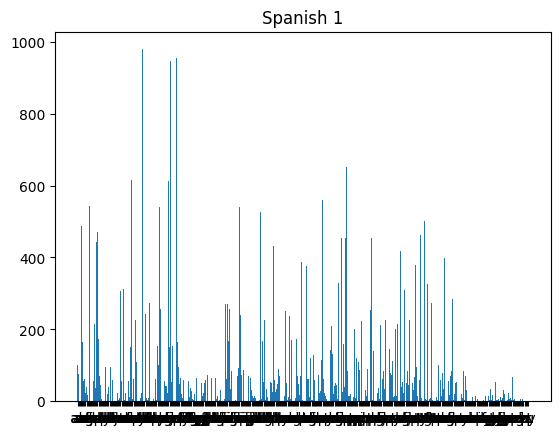

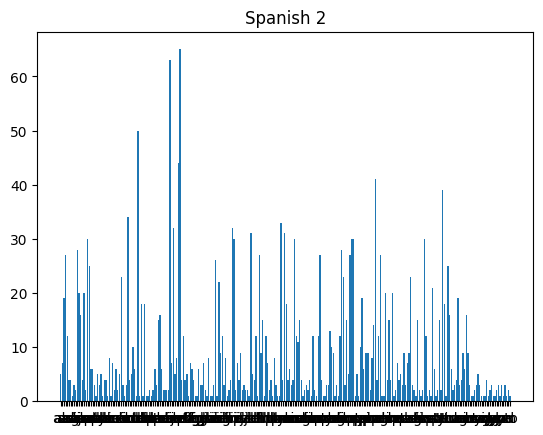

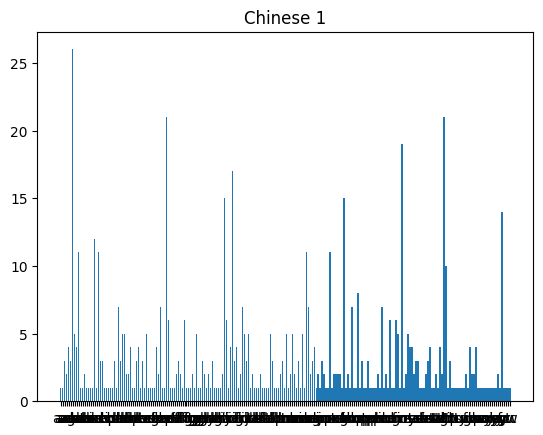

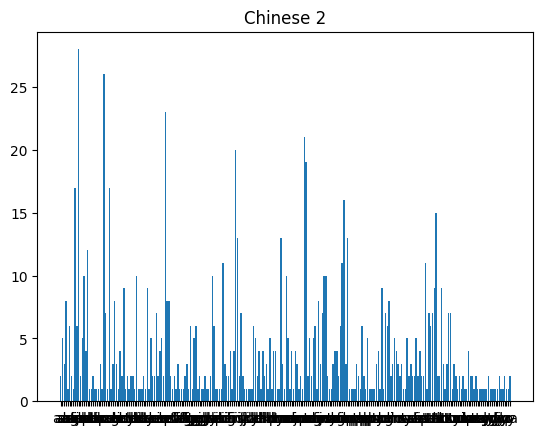

In [ ]:
bigram_es1 = Counter(ngrams(es1,2)) # bigrams
plothistogram(bigram_es1)
plt.title('Spanish 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Spanish 2')
plt.show()

bigram_zh1 = Counter(ngrams(zh1,2))
plothistogram(bigram_zh1)
plt.title('Chinese 1')
plt.show()

bigram_zh2 = Counter(ngrams(zh2,2))
plothistogram(bigram_zh2)
plt.title('Chinese 2')
plt.show()

In [ ]:
from collections import Counter
import numpy as np

def ShowTopn(bifreq, n=10):
    """Show the top-N most frequent bigrams or features from a Counter"""
    for bigram, freq in bifreq.most_common(n):
        print(f"{bigram}: {freq}")


In [ ]:
print('\nSPANISH 1:')
ShowTopn(bigram_es1)
print('\nSPANISH 2:')
ShowTopn(bigram_es2)
print('\nChinese 1:')
ShowTopn(bigram_zh1)
print('\nChinese 2:')
ShowTopn(bigram_zh2)


SPANISH 1:
('d', 'e'): 979
('e', 's'): 954
('e', 'n'): 947
('o', 's'): 652
('r', 'e'): 622
('c', 'o'): 616
('e', 'l'): 613
('n', 't'): 559
('e', 'r'): 555
('a', 'l'): 542

SPANISH 2:
('e', 's'): 65
('e', 'l'): 63
('d', 'e'): 50
('e', 'r'): 44
('r', 'a'): 41
('t', 'e'): 39
('c', 'o'): 34
('m', 'a'): 33
('i', 'n'): 32
('e', 'n'): 32

Chinese 1:
('a', 'n'): 26
('t', 'h'): 21
('e', 'r'): 21
('r', 'o'): 19
('i', 'd'): 17
('h', 'y'): 15
('o', 'i'): 15
('y', 'r'): 14
('c', 'a'): 12
('n', 'c'): 11

Chinese 2:
('a', 'n'): 28
('c', 'a'): 26
('e', 'r'): 23
('n', 'a'): 21
('i', 'n'): 20
('n', 'c'): 19
('c', 'e'): 17
('a', 'l'): 17
('o', 'n'): 16
('t', 'i'): 15


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.
